## Clustering with polygons
### Dataset Comunidades_Autonomas_ETRS89_30N

This notebook executes ClusterApplication to create a clusters shapefile from the data contained in the specified dataset.

This dataset contains polygonal geometries.

In [1]:
%matplotlib inline

import subprocess
import matplotlib.pyplot as plt
import shapefile
import numpy as np

### Execution 1

** Algorithm: ** DBSCAN (eps = 350000, minPts = 0)

** Distance: ** Hausdorff

** Results: ** three clusters are generated: one containing the Peninsula, another one containing the African cities of Ceuta and Melilla and another one containing the Canary Islands. Note that, even though Ceuta is very near to the Peninsula, the algorithm places them in different clusters due to using the Hausdorff distance.

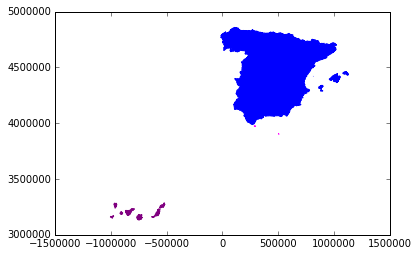

In [2]:
subprocess.call(
    ['java', '-jar', 'application.jar', 'Comunidades_Autonomas_ETRS89_30N', 'Hausdorff', 'DBSCAN', '350000', '0'], 
    stdout=None, stderr=None)

# Plot elements colored by cluster
colors = ['#FF00FF','#800080','#0000FF','#000080','#00FFFF','#008080','#00FF00','#008000','#FFFF00',
          '#808000','#FF0000','#800000','#C0C0C0','#808080','#000000']

i = 0
sf = shapefile.Reader("cluster")
for sr in sf.shapes():
    j = 0
    mat = np.transpose(sr.points)
    length = np.shape(mat)[1]
    
    parts = sr.parts
    parts = np.append(parts, length)
    parts = parts[1:]
    
    for index in parts:
        points_x = []
        points_y = []

        while j < index:
            points_x = np.append(points_x, [mat[0,j]])
            points_y = np.append(points_y, mat[1,j])
            j = j + 1

        plt.fill(points_x,points_y,color=colors[i])
        
    i = i + 1
        
plt.show()

### Execution 2

** Algorithm: ** DBSCAN (eps = 350000, minPts = 0)

** Distance: ** Euclidean

** Results: ** two clusters are generated: one containing the Peninsula + Ceuta and Melilla, and another one containing the Canary Islands. Note that the Peninsula and the African cities are no longer separated, because now we are using the Euclidean distance.

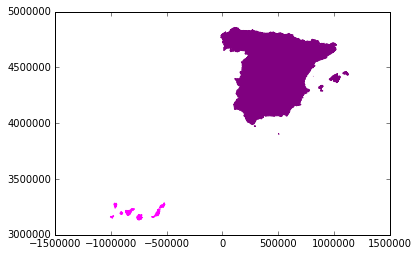

In [3]:
subprocess.call(
    ['java', '-jar', 'application.jar', 'Comunidades_Autonomas_ETRS89_30N', 'Euclidean', 'DBSCAN', '350000', '0'], 
    stdout=None, stderr=None)

# Plot elements colored by cluster
colors = ['#FF00FF','#800080','#0000FF','#000080','#00FFFF','#008080','#00FF00','#008000','#FFFF00',
          '#808000','#FF0000','#800000','#C0C0C0','#808080','#000000']

i = 0
sf = shapefile.Reader("cluster")
for sr in sf.shapes():
    j = 0
    mat = np.transpose(sr.points)
    length = np.shape(mat)[1]
    
    parts = sr.parts
    parts = np.append(parts, length)
    parts = parts[1:]
    
    for index in parts:
        points_x = []
        points_y = []

        while j < index:
            points_x = np.append(points_x, [mat[0,j]])
            points_y = np.append(points_y, mat[1,j])
            j = j + 1

        plt.fill(points_x,points_y,color=colors[i])
        
    i = i + 1
        
plt.show()

### Execution 3

** Algorithm: ** KMeans (eps = 350000, minPts = 0)

** Distance: ** Hausdorff

** Results: ** three clusters are generated from the division of the space in three parts, with no particular concern about cluster density or near neighbors. This is due to using KMeans algorithm.

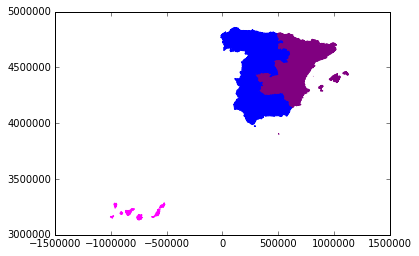

In [4]:
subprocess.call(
    ['java', '-jar', 'application.jar', 'Comunidades_Autonomas_ETRS89_30N', 'Hausdorff', 'KMeans', '3'], 
    stdout=None, stderr=None)

# Plot elements colored by cluster
colors = ['#FF00FF','#800080','#0000FF','#000080','#00FFFF','#008080','#00FF00','#008000','#FFFF00',
          '#808000','#FF0000','#800000','#C0C0C0','#808080','#000000']

i = 0
sf = shapefile.Reader("cluster")
for sr in sf.shapes():
    j = 0
    mat = np.transpose(sr.points)
    length = np.shape(mat)[1]
    
    parts = sr.parts
    parts = np.append(parts, length)
    parts = parts[1:]
    
    for index in parts:
        points_x = []
        points_y = []

        while j < index:
            points_x = np.append(points_x, [mat[0,j]])
            points_y = np.append(points_y, mat[1,j])
            j = j + 1

        plt.fill(points_x,points_y,color=colors[i])
        
    i = i + 1
        
plt.show()

### Conclusions
This dataset consists in a space with one high-density area (the Peninsula + Balear islands) and two sparse elements (the Canary islands and the African cities). Due

### Cleanup

In [14]:
import os, fnmatch
for root, dirs, files in os.walk('.', topdown=False):
    for pattern in ['*.dbf','*.fix','*.prj','*.shp','*.shx']:
        for name in fnmatch.filter(files, pattern):
            os.remove(name)